**Emotion Detection in Twitter Data using NLP Techniques**



Data Processing

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT/Exit test/tweet_emotions .csv')

In [3]:
df.head(25)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [4]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [5]:
sentiment_values = df['sentiment'].unique()
print(sentiment_values)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [6]:
# Map sentiments to emotional categories
emotion_mapping = {
    'empty': 'neutral',
    'sadness': 'sadness',
    'enthusiasm': 'joy',
    'neutral': 'neutral',
    'worry': 'fear',
    'surprise': 'surprise',
    'love': 'joy',
    'fun': 'joy',
    'hate': 'anger',
    'happiness': 'joy',
    'boredom': 'neutral',
    'relief': 'joy',
    'anger': 'anger'
}
df['emotion'] = df['sentiment'].map(emotion_mapping)
df.head(25)

,tweet_id,sentiment,content,emotion
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,neutral
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness
2,1956967696,sadness,Funeral ceremony...gloomy friday...,sadness
3,1956967789,enthusiasm,wants to hang out with friends SOON!,joy
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,fear
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sadness
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,fear
8,1956969035,sadness,@charviray Charlene my love. I miss you,sadness
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,sadness


In [7]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
emotion      0
dtype: int64

In [8]:
# Define the label mapping
label_mapping = {'joy': 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'surprise': 4, 'neutral': 5}

# Map the emotions to their numerical representation
df['emotion_label'] = df['emotion'].map(label_mapping)


In [9]:
df

,tweet_id,sentiment,content,emotion,emotion_label
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,neutral,5
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness,1
2,1956967696,sadness,Funeral ceremony...gloomy friday...,sadness,1
3,1956967789,enthusiasm,wants to hang out with friends SOON!,joy,0
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral,5
...,...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,neutral,5
39996,1753919001,love,Happy Mothers Day All my love,joy,0
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,joy,0
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,joy,0


In [10]:
df.isnull().sum()

tweet_id         0
sentiment        0
content          0
emotion          0
emotion_label    0
dtype: int64

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Text cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    filtered_text = [word for word in tokens if word not in stop_words]


    # Join the tokens back into a single string
    cleaned_text = " ".join(filtered_text)

    return cleaned_text


In [15]:
# Apply text cleaning to the 'content' column
df['cleaned_content'] = df['content'].apply(clean_text)

In [16]:
df.head(25)

,tweet_id,sentiment,content,emotion,emotion_label,cleaned_content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,neutral,5,tiffanylue know wa listenin bad habit earlier ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,sadness,1,layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,sadness,1,funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,joy,0,want hang friend soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,neutral,5,dannycastillo want trade someone ha houston ti...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,fear,3,repinging ghostridah didnt go prom bc bf didnt...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",sadness,1,sleep im thinking old friend want married damn...
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,fear,3,hmmm
8,1956969035,sadness,@charviray Charlene my love. I miss you,sadness,1,charviray charlene love miss
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,sadness,1,kelcouch im sorry least friday


In [17]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['cleaned_content'], df['emotion_label'], test_size=0.2, random_state=42)

In [18]:
# Print the preprocessed data
print(train_data.head())

14307                    thundershower plus baseball equal
17812    hangover movie gon na hilarious wish could see...
11020    playing game leave work work til least pm tonight
15158         stick work till freakin madd suck worked day
24990    sarah_x_atl u mean jack barakats wow u ever go...
Name: cleaned_content, dtype: object


In [19]:
print(train_labels.head())

14307    5
17812    0
11020    3
15158    2
24990    4
Name: emotion_label, dtype: int64


Visualization

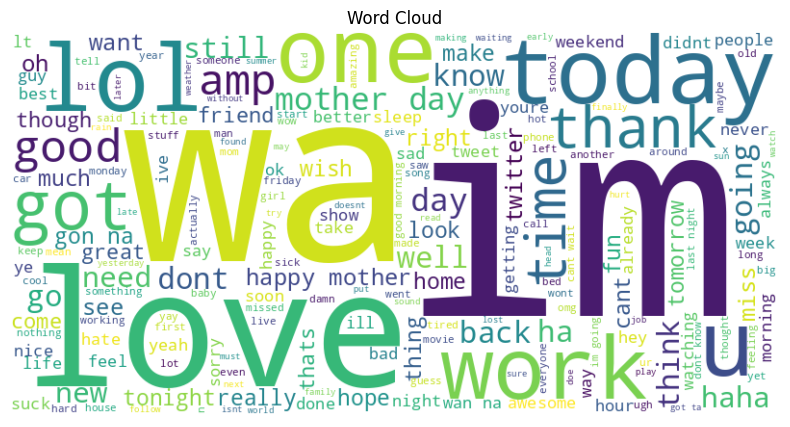

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud
text = ' '.join(df['cleaned_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


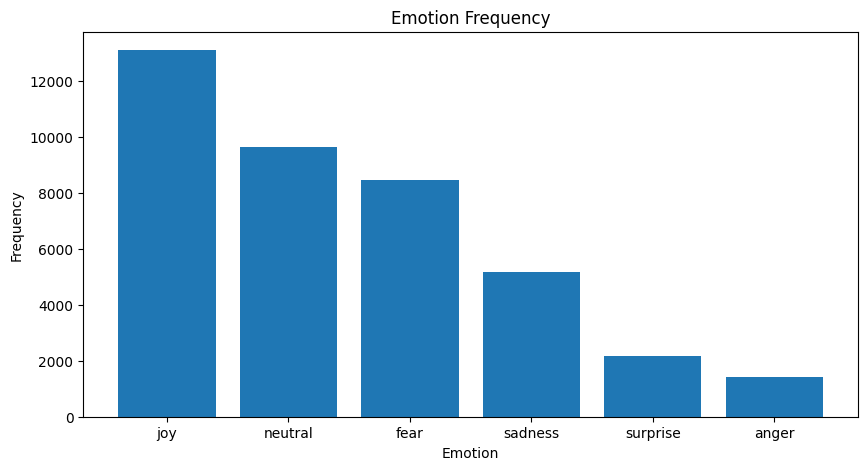

In [21]:
# Count the frequency of each sentiment
emotion_counts = df['emotion'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Emotion Frequency')
plt.show()

Featuring

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack

In [23]:
# Initialize the vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [24]:
# Fit and transform the training data
train_bow = count_vectorizer.fit_transform(train_data)
train_tfidf = tfidf_vectorizer.fit_transform(train_data)

In [25]:
# Transform the testing data
test_bow = count_vectorizer.transform(test_data)
test_tfidf = tfidf_vectorizer.transform(test_data)

In [26]:
# Concatenate the feature matrices
train_features = hstack([train_bow, train_tfidf])
test_features = hstack([test_bow, test_tfidf])

Model Building and Evaluvation

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [28]:
# Initialize the Naive Bayes classifier
classifier = MultinomialNB()

In [29]:

# Train the classifier
classifier.fit(train_features, train_labels)

MultinomialNB()

In [30]:

# Make predictions
predictions = classifier.predict(test_features)

In [31]:

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

In [32]:

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.422125
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.83      0.59      2643
           1       0.38      0.08      0.13      1046
           2       0.60      0.02      0.04       287
           3       0.35      0.45      0.40      1666
           4       0.67      0.00      0.01       425
           5       0.40      0.18      0.25      1933

    accuracy                           0.42      8000
   macro avg       0.48      0.26      0.24      8000
weighted avg       0.43      0.42      0.36      8000



Logestic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [34]:
# Define
logreg = LogisticRegression()


In [35]:
# Train the model
logreg.fit(train_features, train_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
#Make prediction
predictions = logreg.predict(test_features)


In [37]:
#Evaluvate the model
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.443375
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.64      0.60      2643
           1       0.32      0.24      0.28      1046
           2       0.36      0.17      0.23       287
           3       0.36      0.37      0.37      1666
           4       0.21      0.06      0.09       425
           5       0.40      0.46      0.43      1933

    accuracy                           0.44      8000
   macro avg       0.37      0.33      0.33      8000
weighted avg       0.43      0.44      0.43      8000



CNN

In [38]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


In [39]:
# Reshape the feature matrices
train_features = np.expand_dims(train_features.toarray(), axis=2)
test_features = np.expand_dims(test_features.toarray(), axis=2)

In [40]:
#Define CNN Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_features.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=6, activation='softmax'))


In [41]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#Train the model
model.fit(train_features, train_labels, epochs=10, batch_size=32)


In [ ]:
loss, accuracy = model.evaluate(test_features, test_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)


LSTM


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [ ]:
# Define LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(train_features.shape[1], train_features.shape[2])))
model.add(Dense(units=6, activation='softmax'))


In [ ]:
#Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(train_features, train_labels, epochs=10, batch_size=32)


In [ ]:
#Evaluvate the model
loss, accuracy = model.evaluate(test_features, test_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)
